# bank_interest_rate

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan_data_train.csv')
df.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [3]:
df.isna().sum()

ID                                 1
Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      0
Loan.Length                        1
Loan.Purpose                       1
Debt.To.Income.Ratio               1
State                              1
Home.Ownership                     1
Monthly.Income                     3
FICO.Range                         0
Open.CREDIT.Lines                  4
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 69
dtype: int64

In [4]:
df['ID'].nunique() # drop id colum as it have all unique values

2199

In [5]:
df.drop('ID',axis=1,inplace=True)

<AxesSubplot:>

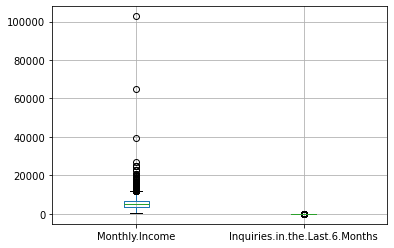

In [6]:
df.boxplot()

In [7]:
str(df.columns).replace(".",'_')

"Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',\n       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',\n       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',\n       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',\n       'Employment_Length'],\n      dtype='object')"

In [8]:
df.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [9]:
df.rename(columns={'Amount.Requested':'Amount_Requested', 
                   'Amount.Funded.By.Investors':'Amount_Funded_By_Investors', 
                   'Interest.Rate':'Interest_Rate',
       'Loan.Length':'Loan_Length', 'Loan.Purpose':'Loan_Purpose', 
                   'Debt.To.Income.Ratio':'Debt_To_Income_Ratio',
                   'State':'State','Home.Ownership':'Home_Ownership',
                   'Monthly.Income':'Monthly_Income',
                   'FICO.Range':'FICO_Range', 
                   'Open.CREDIT.Lines':'Open_CREDIT_Lines',
                   'Revolving.CREDIT.Balance':'Revolving_CREDIT_Balance',
                   'Inquiries.in.the.Last.6.Months':'Inquiries_in_the_Last_6_Months',
                   'Employment.Length':'Employment_Length'},inplace=True)

In [10]:
df.columns

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length'],
      dtype='object')

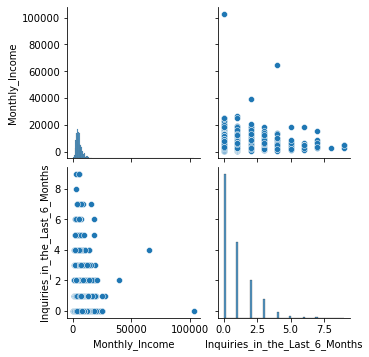

In [11]:
sns.pairplot(df)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2199 non-null   object 
 1   Amount_Funded_By_Investors      2199 non-null   object 
 2   Interest_Rate                   2200 non-null   object 
 3   Loan_Length                     2199 non-null   object 
 4   Loan_Purpose                    2199 non-null   object 
 5   Debt_To_Income_Ratio            2199 non-null   object 
 6   State                           2199 non-null   object 
 7   Home_Ownership                  2199 non-null   object 
 8   Monthly_Income                  2197 non-null   float64
 9   FICO_Range                      2200 non-null   object 
 10  Open_CREDIT_Lines               2196 non-null   object 
 11  Revolving_CREDIT_Balance        2197 non-null   object 
 12  Inquiries_in_the_Last_6_Months  21

In [13]:
df.describe()

,Monthly_Income,Inquiries_in_the_Last_6_Months
count,2197.000000,2197.000000
mean,5727.459290,0.898498
std,4073.529708,1.219223
min,588.500000,0.000000
25%,3458.000000,0.000000
50%,5000.000000,0.000000
75%,6883.330000,1.000000
max,102750.000000,9.000000


### Amount_Requested

In [14]:
df['Amount_Requested'].value_counts()

10000    178
12000    132
5000      96
20000     92
6000      89
        ... 
9525       1
1950       1
15300      1
11950      1
13225      1
Name: Amount_Requested, Length: 356, dtype: int64

In [15]:
df['Amount_Requested'].unique()

array(['25000', '19750', '2100', '28000', '24250', '5400', '16000',
       '6400', '24000', '8000', '9000', '13000', '10000', '3600', '7350',
       '17000', '18825', '4200', '5000', '3700', '6625', '15000', '29175',
       '6000', '22000', '18000', '12000', '6500', '4000', '7300', '19400',
       '11625', '3000', '19000', '2500', '17350', '21000', '20000',
       '1900', '23300', '8400', '1600', '7200', '15400', '7000', '20500',
       '24375', '5875', '14000', '5500', '4800', '34500', '20950', '7500',
       '14400', '14675', '24500', '35000', '11200', '30000', '3200',
       '11700', '11500', '8500', '16500', '16550', '13250', '5200',
       '2000', '4500', '20800', '8325', '6600', '7750', '19500', '27050',
       '8800', '11000', '3500', '21200', '2650', '8575', '13200', '10750',
       '5450', '2400', '15300', '17325', '19125', '19075', '5600',
       '10400', '16450', '11325', '10050', '14725', '16750', '4325',
       '10075', '10800', '23500', '6200', '2875', '27825', '12250',
 

In [16]:
df['Amount_Requested'].isna().sum()

1

In [17]:
df['Amount_Requested'].loc[df['Amount_Requested']=='.']

371     .
1357    .
1791    .
1991    .
Name: Amount_Requested, dtype: object

In [18]:
#df['Amount_Requested'].unique()

In [19]:
df['Amount_Requested'].replace('.',np.nan,inplace=True)

In [20]:
df['Amount_Requested'].isna() .sum()

5

In [21]:
df['Amount_Requested']=df['Amount_Requested'].astype('float')

In [22]:
df['Amount_Requested'].dtype

dtype('float64')

In [23]:
df['Amount_Requested'].mean()

12496.469248291573

In [24]:
df['Amount_Requested'].mode()[0]

10000.0

In [25]:
df['Amount_Requested'].median()

10000.0

In [26]:
df['Amount_Requested'].fillna(df['Amount_Requested'].median(),inplace=True)

<AxesSubplot:xlabel='Amount_Requested'>

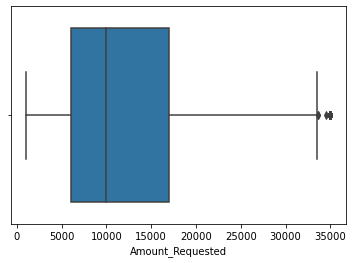

In [27]:
sns.boxplot(df['Amount_Requested'])

In [28]:
iqr=df['Amount_Requested'].quantile(0.75)-df['Amount_Requested'].quantile(0.25)
upper_limit=df['Amount_Requested'].quantile(0.75)+2*iqr
print("IQR",iqr)
print("upper limit",upper_limit)

IQR 11000.0
upper limit 39000.0


In [29]:
df['Amount_Requested'].loc[df['Amount_Requested']>upper_limit]

Series([], Name: Amount_Requested, dtype: float64)

In [30]:
# df.info()

### Amount_Funded_By_Investors

In [31]:
df['Amount_Funded_By_Investors'].dtype

dtype('O')

In [32]:
df['Amount_Funded_By_Investors'].isna().sum()

1

In [33]:
df['Amount_Funded_By_Investors'].replace('.',np.nan,inplace=True)

In [34]:
df['Amount_Funded_By_Investors']=df['Amount_Funded_By_Investors'].astype('float')

In [35]:
df['Amount_Funded_By_Investors'].mean()

12077.803406193085

In [36]:
df['Amount_Funded_By_Investors'].mode()

0    10000.0
Name: Amount_Funded_By_Investors, dtype: float64

In [37]:
df['Amount_Funded_By_Investors'].median()

10000.0

In [38]:
df['Amount_Funded_By_Investors'].fillna(df['Amount_Funded_By_Investors'].median(),inplace=True)

<AxesSubplot:xlabel='Amount_Funded_By_Investors'>

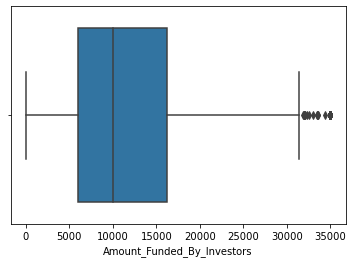

In [39]:
sns.boxplot(df['Amount_Funded_By_Investors'])

In [40]:
iqr=df['Amount_Funded_By_Investors'].quantile(0.75)-df['Amount_Funded_By_Investors'].quantile(0.25)
upper_limit=df['Amount_Funded_By_Investors'].quantile(0.75)+3*iqr
print("IQR",iqr)
print("upper limit",upper_limit)

IQR 10200.0
upper limit 46800.0


In [41]:
df['Amount_Funded_By_Investors'].loc[df['Amount_Funded_By_Investors']>upper_limit]

Series([], Name: Amount_Funded_By_Investors, dtype: float64)

# Interest_Rate >>>>>> target column

In [42]:
df['Interest_Rate'].dtype

dtype('O')

In [43]:
df['Interest_Rate']

0       18.49%
1       17.27%
2       14.33%
3       16.29%
4       12.23%
         ...  
2195    23.28%
2196    14.33%
2197    15.31%
2198    20.99%
2199    10.16%
Name: Interest_Rate, Length: 2200, dtype: object

In [44]:
df['Interest_Rate']=df["Interest_Rate"].str.replace("%","")

In [45]:
df['Interest_Rate']=df['Interest_Rate'].astype('float') 

In [46]:
df['Interest_Rate'].isna().sum()

0

In [47]:
df.isna().sum()

Amount_Requested                   0
Amount_Funded_By_Investors         0
Interest_Rate                      0
Loan_Length                        1
Loan_Purpose                       1
Debt_To_Income_Ratio               1
State                              1
Home_Ownership                     1
Monthly_Income                     3
FICO_Range                         0
Open_CREDIT_Lines                  4
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 69
dtype: int64

### Loan_Length

In [48]:
df['Loan_Length'].value_counts().to_dict()

{'36 months': 1722, '60 months': 476, '.': 1}

In [49]:
df['Loan_Length'].replace({'36 months': 36, '60 months': 60},inplace=True)

<AxesSubplot:xlabel='Loan_Length', ylabel='count'>

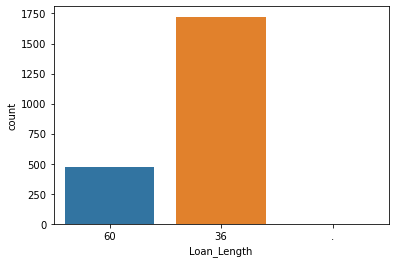

In [50]:
sns.countplot(df['Loan_Length'])

In [51]:
df['Loan_Length'].replace('.',np.nan,inplace=True)

In [52]:
df['Loan_Length'].fillna((df['Loan_Length'].median()),inplace=True)

### Loan_Purpose

In [53]:
df['Loan_Purpose'].value_counts()

debt_consolidation    1147
credit_card            394
other                  174
home_improvement       135
major_purchase          84
small_business          80
car                     45
wedding                 35
medical                 26
moving                  25
house                   19
vacation                18
educational             14
renewable_energy         3
Name: Loan_Purpose, dtype: int64

In [54]:
df_Loan_Purpose=pd.get_dummies(df['Loan_Purpose'])
df.drop('Loan_Purpose',axis=1,inplace=True)
df_Loan_Purpose

,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2196,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2197,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2198,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
# df.info()

### Debt_To_Income_Ratio

In [56]:
df['Debt_To_Income_Ratio'].nunique()

1526

In [57]:
df['Debt_To_Income_Ratio'].dtype

dtype('O')

In [58]:
df['Debt_To_Income_Ratio']=df["Debt_To_Income_Ratio"].str.replace("%","")

In [59]:
df['Debt_To_Income_Ratio']=df['Debt_To_Income_Ratio'].astype('float')

In [60]:
df['Debt_To_Income_Ratio'].dtype

dtype('float64')

<AxesSubplot:xlabel='Debt_To_Income_Ratio'>

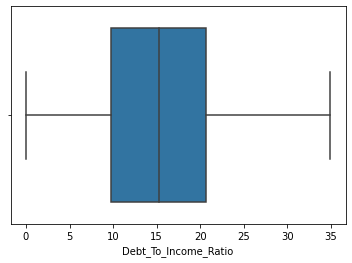

In [61]:
sns.boxplot(df['Debt_To_Income_Ratio'])

In [62]:
df['Debt_To_Income_Ratio'].fillna((df['Debt_To_Income_Ratio'].median()),inplace=True)

In [63]:
df=pd.concat([df,df_Loan_Purpose],axis=1)
df

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,25000.0,25000.00,18.49,60.0,27.56,VA,MORTGAGE,8606.56,720-724,11,...,0,0,0,0,0,0,0,0,0,0
1,19750.0,19750.00,17.27,60.0,13.39,NY,MORTGAGE,6737.50,710-714,14,...,0,0,0,0,0,0,0,0,0,0
2,2100.0,2100.00,14.33,36.0,3.50,LA,OWN,1000.00,690-694,13,...,0,0,1,0,0,0,0,0,0,0
3,28000.0,28000.00,16.29,36.0,19.62,NV,MORTGAGE,7083.33,710-714,12,...,0,0,0,0,0,0,0,0,0,0
4,24250.0,17431.82,12.23,60.0,23.79,OH,MORTGAGE,5833.33,730-734,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000.0,30000.00,23.28,60.0,12.10,IL,MORTGAGE,7083.33,675-679,16,...,0,0,0,0,0,1,0,0,0,0
2196,4200.0,4200.00,14.33,60.0,14.16,NJ,RENT,3850.00,700-704,4,...,0,0,0,0,0,0,0,0,0,0
2197,19800.0,19775.00,15.31,60.0,15.03,IL,MORTGAGE,6666.67,675-679,10,...,0,0,0,0,0,0,0,0,0,0
2198,18000.0,18000.00,20.99,60.0,11.63,CA,RENT,9051.83,670-674,5,...,0,0,0,0,0,0,0,0,0,0


# State

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2200 non-null   float64
 1   Amount_Funded_By_Investors      2200 non-null   float64
 2   Interest_Rate                   2200 non-null   float64
 3   Loan_Length                     2200 non-null   float64
 4   Debt_To_Income_Ratio            2200 non-null   float64
 5   State                           2199 non-null   object 
 6   Home_Ownership                  2199 non-null   object 
 7   Monthly_Income                  2197 non-null   float64
 8   FICO_Range                      2200 non-null   object 
 9   Open_CREDIT_Lines               2196 non-null   object 
 10  Revolving_CREDIT_Balance        2197 non-null   object 
 11  Inquiries_in_the_Last_6_Months  2197 non-null   float64
 12  Employment_Length               21

In [65]:
#df['State'].value_counts()

In [66]:
df_state=pd.get_dummies(df['State'])
df_state.head()

,.,AK,AL,AR,AZ,CA,CO,CT,DC,DE,...,SC,SD,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Home_Ownership

In [67]:
df['Home_Ownership'].value_counts()

MORTGAGE    1018
RENT         999
OWN          177
OTHER          4
NONE           1
Name: Home_Ownership, dtype: int64

In [68]:
Home_Ownership_onehot = pd.get_dummies(df['Home_Ownership'],drop_first=True)

In [254]:
Home_Ownership_onehot

,NONE,OTHER,OWN,RENT
0,0,0,0,0
1,0,0,0,0
2,0,0,1,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
2195,0,0,0,0
2196,0,0,0,1
2197,0,0,0,0
2198,0,0,0,1


# Monthly_Income

In [70]:
df['Monthly_Income']

0       8606.56
1       6737.50
2       1000.00
3       7083.33
4       5833.33
         ...   
2195    7083.33
2196    3850.00
2197    6666.67
2198    9051.83
2199    8333.33
Name: Monthly_Income, Length: 2200, dtype: float64

In [71]:
df['Monthly_Income'].describe()

count      2197.000000
mean       5727.459290
std        4073.529708
min         588.500000
25%        3458.000000
50%        5000.000000
75%        6883.330000
max      102750.000000
Name: Monthly_Income, dtype: float64

<AxesSubplot:xlabel='Monthly_Income'>

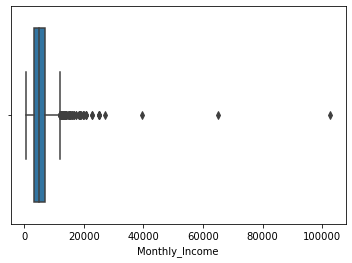

In [72]:
sns.boxplot(x=df['Monthly_Income'])

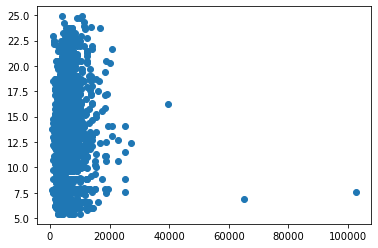

In [73]:
plt.scatter(df['Monthly_Income'],df['Interest_Rate'])

<AxesSubplot:xlabel='Monthly_Income', ylabel='Count'>

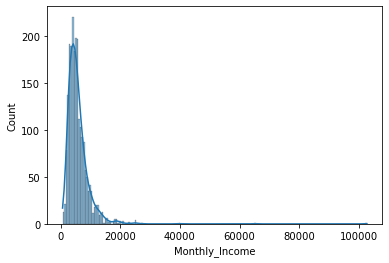

In [74]:
sns.histplot(df['Monthly_Income'],kde=True)

In [75]:
df['Monthly_Income'].fillna((df['Monthly_Income'].median()),inplace=True)

# FICO_Range

In [76]:
df['FICO_Range']

0       720-724
1       710-714
2       690-694
3       710-714
4       730-734
         ...   
2195    675-679
2196    700-704
2197    675-679
2198    670-674
2199    710-714
Name: FICO_Range, Length: 2200, dtype: object

In [77]:
def fico(str1):
    result=str1.split('-')
    score=int((int(result[0])+int(result[1]))/2)
    return score
df['FICO_Range']=df['FICO_Range'].apply(fico)

In [78]:
df['FICO_Range']

0       722
1       712
2       692
3       712
4       732
       ... 
2195    677
2196    702
2197    677
2198    672
2199    712
Name: FICO_Range, Length: 2200, dtype: int64

In [79]:
#df.info()

# Open_CREDIT_Lines

In [80]:
df['Open_CREDIT_Lines']

0       11
1       14
2       13
3       12
4        6
        ..
2195    16
2196     4
2197    10
2198     5
2199    10
Name: Open_CREDIT_Lines, Length: 2200, dtype: object

In [81]:
df['Open_CREDIT_Lines'].describe()

count     2196
unique      29
top          8
freq       226
Name: Open_CREDIT_Lines, dtype: object

In [82]:
df['Open_CREDIT_Lines'].isna().sum()

4

In [83]:
df['Open_CREDIT_Lines'].replace('.',np.nan,inplace=True)

In [84]:
median = df['Open_CREDIT_Lines'].median()

In [85]:
df['Open_CREDIT_Lines'].fillna(median,axis=0,inplace=True)

In [86]:
df['Open_CREDIT_Lines'].isna().sum()

0

In [87]:
df['Open_CREDIT_Lines']=df['Open_CREDIT_Lines'].astype(int)

<AxesSubplot:xlabel='Open_CREDIT_Lines'>

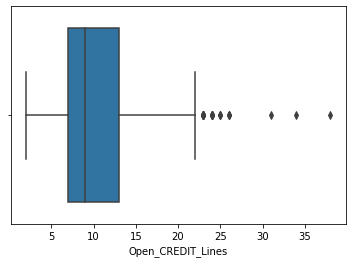

In [88]:
sns.boxplot(x=df['Open_CREDIT_Lines'])

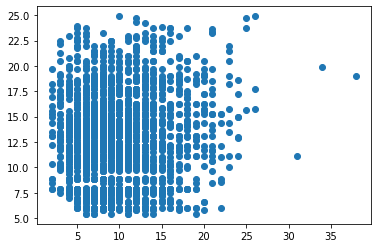

In [89]:
plt.scatter(df['Open_CREDIT_Lines'],df['Interest_Rate'])

<AxesSubplot:xlabel='Monthly_Income', ylabel='Count'>

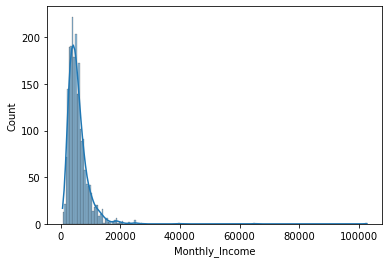

In [90]:
sns.histplot(df['Monthly_Income'],kde=True)

In [91]:
df[df['Open_CREDIT_Lines']>35]

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
2117,35000.0,35000.0,19.05,36.0,21.12,CT,MORTGAGE,13750.0,737,38,...,0,0,0,0,0,0,0,0,0,0


In [92]:
df[df['Open_CREDIT_Lines']>30]

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
1244,21000.0,6165.31,11.09,36.0,21.28,CA,OWN,18333.33,747,31,...,1,0,0,0,0,0,0,0,0,0
1660,10000.0,10000.00,19.91,36.0,23.35,CO,MORTGAGE,6000.00,682,34,...,0,0,0,0,0,0,0,0,0,0
2117,35000.0,35000.00,19.05,36.0,21.12,CT,MORTGAGE,13750.00,737,38,...,0,0,0,0,0,0,0,0,0,0


# concat

In [93]:
df=pd.concat([df,Home_Ownership_onehot,df_state],axis=1)
df

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,...,SC,SD,TX,UT,VA,VT,WA,WI,WV,WY
0,25000.0,25000.00,18.49,60.0,27.56,VA,MORTGAGE,8606.56,722,11,...,0,0,0,0,1,0,0,0,0,0
1,19750.0,19750.00,17.27,60.0,13.39,NY,MORTGAGE,6737.50,712,14,...,0,0,0,0,0,0,0,0,0,0
2,2100.0,2100.00,14.33,36.0,3.50,LA,OWN,1000.00,692,13,...,0,0,0,0,0,0,0,0,0,0
3,28000.0,28000.00,16.29,36.0,19.62,NV,MORTGAGE,7083.33,712,12,...,0,0,0,0,0,0,0,0,0,0
4,24250.0,17431.82,12.23,60.0,23.79,OH,MORTGAGE,5833.33,732,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000.0,30000.00,23.28,60.0,12.10,IL,MORTGAGE,7083.33,677,16,...,0,0,0,0,0,0,0,0,0,0
2196,4200.0,4200.00,14.33,60.0,14.16,NJ,RENT,3850.00,702,4,...,0,0,0,0,0,0,0,0,0,0
2197,19800.0,19775.00,15.31,60.0,15.03,IL,MORTGAGE,6666.67,677,10,...,0,0,0,0,0,0,0,0,0,0
2198,18000.0,18000.00,20.99,60.0,11.63,CA,RENT,9051.83,672,5,...,0,0,0,0,0,0,0,0,0,0


# Revolving.CREDIT.Balance

In [94]:
#column_name
df.rename({'Revolving.CREDIT.Balance':'Revolving_CREDIT_Balance'},axis=1,inplace=True)
df['Revolving_CREDIT_Balance']

0       15210
1       19070
2         893
3       38194
4       31061
        ...  
2195    17969
2196     5718
2197    46879
2198    32394
2199    10204
Name: Revolving_CREDIT_Balance, Length: 2200, dtype: object

In [95]:
df['Revolving_CREDIT_Balance'].isna().sum()

3

In [96]:
df['Revolving_CREDIT_Balance'].nunique()

2080

In [97]:
df['Revolving_CREDIT_Balance'].unique()

array(['15210', '19070', '893', ..., '46879', '32394', '10204'],
      dtype=object)

In [98]:
df['Revolving_CREDIT_Balance'].replace('.',np.nan,inplace=True)

In [99]:
df['Revolving_CREDIT_Balance']=df['Revolving_CREDIT_Balance'].astype('float')

<AxesSubplot:xlabel='Revolving_CREDIT_Balance'>

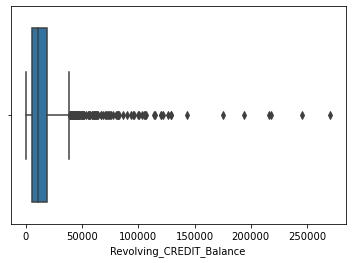

In [100]:
# outliers
sns.boxplot(df['Revolving_CREDIT_Balance'])

In [101]:
df['Revolving_CREDIT_Balance'].fillna(df['Revolving_CREDIT_Balance'].median(),inplace=True)

In [102]:
df['Revolving_CREDIT_Balance'].isna().sum()

0

In [103]:
# iqr
q3=df['Revolving_CREDIT_Balance'].quantile(0.75)
q1=df['Revolving_CREDIT_Balance'].quantile(0.25)

iqr=q3-q1
upper_tail=q3+(3*iqr)
lower_tail=q1-(3*iqr)
upper_tail

58465.25

In [104]:
df['Revolving_CREDIT_Balance']=np.log(df['Revolving_CREDIT_Balance'])
df['Revolving_CREDIT_Balance'].head()

0     9.629708
1     9.855872
2     6.794587
3    10.550434
4    10.343708
Name: Revolving_CREDIT_Balance, dtype: float64

<AxesSubplot:xlabel='Revolving_CREDIT_Balance'>

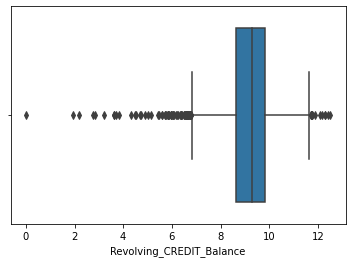

In [105]:
sns.boxplot(df['Revolving_CREDIT_Balance'])

In [106]:
# iqr
q3=df['Revolving_CREDIT_Balance'].quantile(0.75)
q1=df['Revolving_CREDIT_Balance'].quantile(0.25)

iqr=q3-q1
upper_tail=q3+(1.5*iqr)
lower_tail=q1-(1.5*iqr)
lower_tail

6.817316022651861

In [107]:
df.loc[(df['Revolving_CREDIT_Balance']>upper_tail)|(df['Revolving_CREDIT_Balance']<lower_tail)].shape

(116, 77)

In [108]:
df.loc[(df['Revolving_CREDIT_Balance']>upper_tail),'Revolving_CREDIT_Balance']=upper_tail
df.loc[(df['Revolving_CREDIT_Balance']<lower_tail),'Revolving_CREDIT_Balance']=lower_tail

<AxesSubplot:xlabel='Revolving_CREDIT_Balance'>

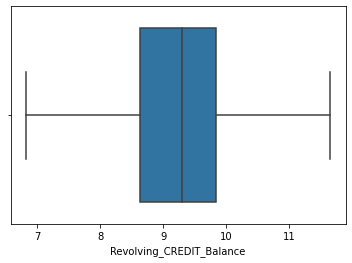

In [109]:
# after removing outliers
sns.boxplot(df['Revolving_CREDIT_Balance'])

# Inquiries.in.the.Last.6.Months

In [110]:
#column_name
df.rename({'Inquiries.in.the.Last.6.Months':'Inquiries_in_the_Last_6_Months'},axis=1,inplace=True)
df['Inquiries_in_the_Last_6_Months']

0       3.0
1       3.0
2       1.0
3       1.0
4       2.0
       ... 
2195    1.0
2196    0.0
2197    3.0
2198    2.0
2199    0.0
Name: Inquiries_in_the_Last_6_Months, Length: 2200, dtype: float64

In [111]:
df['Inquiries_in_the_Last_6_Months'].isna().sum()

3

In [112]:
df['Inquiries_in_the_Last_6_Months'].nunique()

10

In [113]:
df['Inquiries_in_the_Last_6_Months']=df['Inquiries_in_the_Last_6_Months'].astype('float')

<AxesSubplot:xlabel='Inquiries_in_the_Last_6_Months'>

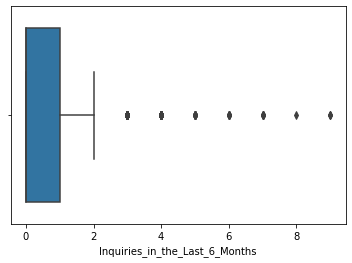

In [114]:
# outliers
sns.boxplot(df['Inquiries_in_the_Last_6_Months'])

In [115]:
df['Inquiries_in_the_Last_6_Months'].fillna(df['Inquiries_in_the_Last_6_Months'].median(),inplace=True)

In [116]:
# iqr
q3=df['Inquiries_in_the_Last_6_Months'].quantile(0.75)
q1=df['Inquiries_in_the_Last_6_Months'].quantile(0.25)

iqr=q3-q1
upper_tail=q3+(1.5*iqr)
lower_tail=q1-(1.5*iqr)
upper_tail

2.5

In [117]:
df.loc[df['Inquiries_in_the_Last_6_Months']>upper_tail].shape

(222, 77)

In [118]:
df.loc[(df['Inquiries_in_the_Last_6_Months']>upper_tail),'Inquiries_in_the_Last_6_Months']=upper_tail

<AxesSubplot:xlabel='Inquiries_in_the_Last_6_Months'>

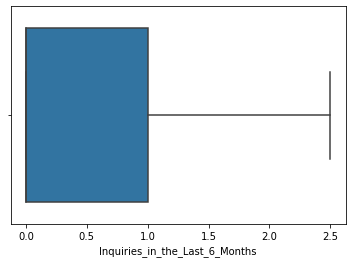

In [119]:
sns.boxplot(df['Inquiries_in_the_Last_6_Months'])

# Employment.Length

In [120]:
#column_name
df.rename({'Employment.Length':'Employment_Length'},axis=1,inplace=True)
df['Employment_Length']

0         5 years
1         4 years
2        < 1 year
3       10+ years
4       10+ years
          ...    
2195    10+ years
2196      2 years
2197      6 years
2198      4 years
2199      2 years
Name: Employment_Length, Length: 2200, dtype: object

In [121]:
df['Employment_Length'].isna().sum()

69

In [122]:
df['Employment_Length'].isna().mean()*100

3.1363636363636362

In [123]:
df['Employment_Length'].nunique()

12

In [124]:
df['Employment_Length'].unique()

array(['5 years', '4 years', '< 1 year', '10+ years', nan, '2 years',
       '8 years', '1 year', '6 years', '7 years', '3 years', '9 years',
       '.'], dtype=object)

In [125]:
df['Employment_Length'].value_counts()

10+ years    575
< 1 year     229
2 years      217
3 years      203
5 years      181
4 years      162
1 year       159
6 years      134
7 years      109
8 years       95
9 years       66
.              1
Name: Employment_Length, dtype: int64

In [126]:
df['Employment_Length'].fillna('10+ years',inplace=True)

In [127]:
df['Employment_Length'].unique()

array(['5 years', '4 years', '< 1 year', '10+ years', '2 years',
       '8 years', '1 year', '6 years', '7 years', '3 years', '9 years',
       '.'], dtype=object)

In [128]:
df['Employment_Length'].replace({'5 years':5, '4 years':4, '< 1 year':0.5, '10+ years':10, '2 years':2,
       '8 years':8, '1 year':1, '6 years':6, '7 years':7, '3 years':3, '9 years':9},inplace=True)

In [129]:
df['Employment_Length'].unique()

array([5, 4, 0.5, 10, 2, 8, 1, 6, 7, 3, 9, '.'], dtype=object)

In [130]:
df['Employment_Length'].dtype

dtype('O')

In [131]:
df['Employment_Length'].replace('.',np.nan,inplace=True)

<AxesSubplot:xlabel='Employment_Length'>

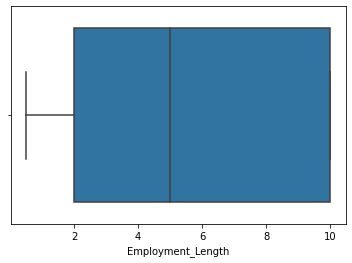

In [132]:
sns.boxplot(df['Employment_Length'])

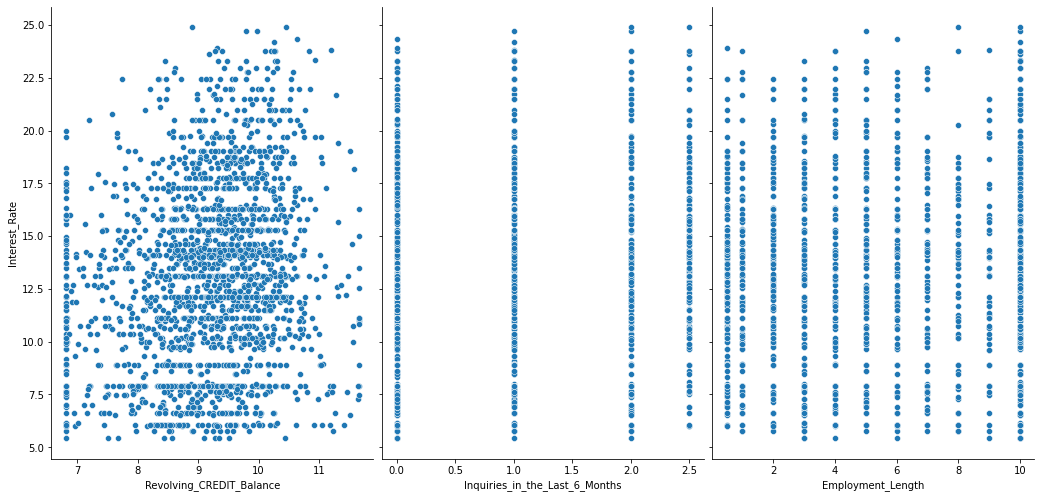

In [133]:
# pairplot 
sns.pairplot(df,x_vars=['Revolving_CREDIT_Balance','Inquiries_in_the_Last_6_Months','Employment_Length'],y_vars='Interest_Rate',size=7,aspect=0.7)

In [134]:
#df.info()

In [135]:
df.isna().sum()

Amount_Requested              0
Amount_Funded_By_Investors    0
Interest_Rate                 0
Loan_Length                   0
Debt_To_Income_Ratio          0
                             ..
VT                            0
WA                            0
WI                            0
WV                            0
WY                            0
Length: 77, dtype: int64

In [136]:
# plt.figure(figsize=(20,10))
# sns.heatmap(df.isnull(),cbar=False)

# feature_selection

In [137]:
df.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,...,SC,SD,TX,UT,VA,VT,WA,WI,WV,WY
0,25000.0,25000.00,18.49,60.0,27.56,VA,MORTGAGE,8606.56,722,11,...,0,0,0,0,1,0,0,0,0,0
1,19750.0,19750.00,17.27,60.0,13.39,NY,MORTGAGE,6737.50,712,14,...,0,0,0,0,0,0,0,0,0,0
2,2100.0,2100.00,14.33,36.0,3.50,LA,OWN,1000.00,692,13,...,0,0,0,0,0,0,0,0,0,0
3,28000.0,28000.00,16.29,36.0,19.62,NV,MORTGAGE,7083.33,712,12,...,0,0,0,0,0,0,0,0,0,0
4,24250.0,17431.82,12.23,60.0,23.79,OH,MORTGAGE,5833.33,732,6,...,0,0,0,0,0,0,0,0,0,0


In [138]:
df=df.drop(['State','Home_Ownership'],axis=1)
df.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,...,SC,SD,TX,UT,VA,VT,WA,WI,WV,WY
0,25000.0,25000.00,18.49,60.0,27.56,8606.56,722,11,9.629708,2.5,...,0,0,0,0,1,0,0,0,0,0
1,19750.0,19750.00,17.27,60.0,13.39,6737.50,712,14,9.855872,2.5,...,0,0,0,0,0,0,0,0,0,0
2,2100.0,2100.00,14.33,36.0,3.50,1000.00,692,13,6.817316,1.0,...,0,0,0,0,0,0,0,0,0,0
3,28000.0,28000.00,16.29,36.0,19.62,7083.33,712,12,10.550434,1.0,...,0,0,0,0,0,0,0,0,0,0
4,24250.0,17431.82,12.23,60.0,23.79,5833.33,732,6,10.343708,2.0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
df=df.dropna()

In [140]:
df.shape

(2199, 75)

In [141]:
df.columns

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Debt_To_Income_Ratio', 'Monthly_Income', 'FICO_Range',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length', 'car',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'house', 'major_purchase', 'medical', 'moving', 'other',
       'renewable_energy', 'small_business', 'vacation', 'wedding', 'NONE',
       'OTHER', 'OWN', 'RENT', '.', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT',
       'DC', 'DE', 'FL', 'GA', 'HI', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI',
       'WV', 'WY'],
      dtype='object')

In [142]:
# dropping NONE and '.' columns
df=df.drop(['NONE','.'],axis=1)
df.columns

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Debt_To_Income_Ratio', 'Monthly_Income', 'FICO_Range',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length', 'car',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'house', 'major_purchase', 'medical', 'moving', 'other',
       'renewable_energy', 'small_business', 'vacation', 'wedding', 'OTHER',
       'OWN', 'RENT', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE',
       'FL', 'GA', 'HI', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR',
       'PA', 'RI', 'SC', 'SD', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object')

# Without Feature Selection 

## Linear Regression

In [143]:
df1 = df.copy()

In [144]:
df1.tail()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,...,SC,SD,TX,UT,VA,VT,WA,WI,WV,WY
2195,30000.0,30000.0,23.28,60.0,12.10,7083.33,677,16,9.796403,1.0,...,0,0,0,0,0,0,0,0,0,0
2196,4200.0,4200.0,14.33,60.0,14.16,3850.00,702,4,8.651374,0.0,...,0,0,0,0,0,0,0,0,0,0
2197,19800.0,19775.0,15.31,60.0,15.03,6666.67,677,10,10.755325,2.5,...,0,0,0,0,0,0,0,0,0,0
2198,18000.0,18000.0,20.99,60.0,11.63,9051.83,672,5,10.385728,2.0,...,0,0,0,0,0,0,0,0,0,0
2199,7550.0,7550.0,10.16,36.0,3.83,8333.33,712,10,9.230535,0.0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
df1.shape


(2199, 73)

In [146]:

df1.isna().sum()


Amount_Requested              0
Amount_Funded_By_Investors    0
Interest_Rate                 0
Loan_Length                   0
Debt_To_Income_Ratio          0
                             ..
VT                            0
WA                            0
WI                            0
WV                            0
WY                            0
Length: 73, dtype: int64

In [147]:

x = df1.drop(['Interest_Rate'],axis=1)
y = df1['Interest_Rate']

In [148]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [149]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=5)

In [150]:
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [151]:
# Testing data

y_pred_test_linear = linear.predict(x_test)

mae = mean_absolute_error(y_test,y_pred_test_linear)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_test,y_pred_test_linear)
print('mean_squared_error >>  ', mse)

rmae = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmae)

r2_scores = r2_score(y_test,y_pred_test_linear)
print('r2_scores >>  ', r2_scores)

mean_absolute_error >>   1.618066610383886
mean_squared_error >>   4.335561168205726
root_mean_squared_error >>   2.082201039334513
r2_scores >>   0.7490175269311521


In [152]:
# Training data

y_pred_train_linear = linear.predict(x_train)

mae = mean_absolute_error(y_train,y_pred_train_linear)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_train,y_pred_train_linear)
print('mean_squared_error >>  ', mse)

rmae = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmae)

r2_scores = r2_score(y_train,y_pred_train_linear)
print('r2_scores >>  ', r2_scores)


mean_absolute_error >>   1.507322491863948
mean_squared_error >>   3.77471406651892
root_mean_squared_error >>   1.942862338540464
r2_scores >>   0.7837046384883604


# Ridge 

In [153]:
ridge = Ridge()

hyp={'alpha':np.arange(0.1,1.1,0.1)}

ridge_rscv = RandomizedSearchCV(ridge,hyp,cv=10)
ridge_rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=Ridge(),
                   param_distributions={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [154]:
ridge_rscv.best_params_

{'alpha': 1.0}

In [155]:
# Testing data

y_pred_test = ridge_rscv.predict(x_test)

mae = mean_absolute_error(y_test,y_pred_test)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_test,y_pred_test)
print('mean_squared_error >>  ', mse)

rmae = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmae)

r2_scores = r2_score(y_test,y_pred_test)
print('r2_scores >>  ', r2_scores)


mean_absolute_error >>   1.614499520178782
mean_squared_error >>   4.326999014626896
root_mean_squared_error >>   2.080143988916848
r2_scores >>   0.7495131837554103


In [156]:
# Training data

y_pred_train = ridge_rscv.predict(x_train)

mae = mean_absolute_error(y_train,y_pred_train)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_train,y_pred_train)
print('mean_squared_error >>  ', mse)

rmae = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmae)

r2_scores = r2_score(y_train,y_pred_train)
print('r2_scores >>  ', r2_scores)


mean_absolute_error >>   1.5095834489200126
mean_squared_error >>   3.7826816212091394
root_mean_squared_error >>   1.9449117258140893
r2_scores >>   0.7832480886433348


# Lasso

In [157]:
lasso = Lasso()

hyp={'alpha':np.arange(0.1,1.1,0.1)}

lasso_rscv = RandomizedSearchCV(ridge,hyp,cv=10)
lasso_rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=Ridge(),
                   param_distributions={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [158]:
lasso_rscv.best_params_

{'alpha': 1.0}

In [159]:
# Testing data

y_pred_test = lasso_rscv.predict(x_test)

mae = mean_absolute_error(y_test,y_pred_test)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_test,y_pred_test)
print('mean_squared_error >>  ', mse)

rmae = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmae)

r2_scores = r2_score(y_test,y_pred_test)
print('r2_scores >>  ', r2_scores)


mean_absolute_error >>   1.614499520178782
mean_squared_error >>   4.326999014626896
root_mean_squared_error >>   2.080143988916848
r2_scores >>   0.7495131837554103


In [160]:
# Training data

y_pred_train = lasso_rscv.predict(x_train)

mae = mean_absolute_error(y_train,y_pred_train)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_train,y_pred_train)
print('mean_squared_error >>  ', mse)

rmae = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmae)

r2_scores = r2_score(y_train,y_pred_train)
print('r2_scores >>  ', r2_scores)


mean_absolute_error >>   1.5095834489200126
mean_squared_error >>   3.7826816212091394
root_mean_squared_error >>   1.9449117258140893
r2_scores >>   0.7832480886433348


# Feature Selection

## Fisher Score

In [161]:
!pip install skfeature-chappers
from skfeature.function.similarity_based import fisher_score

<AxesSubplot:>

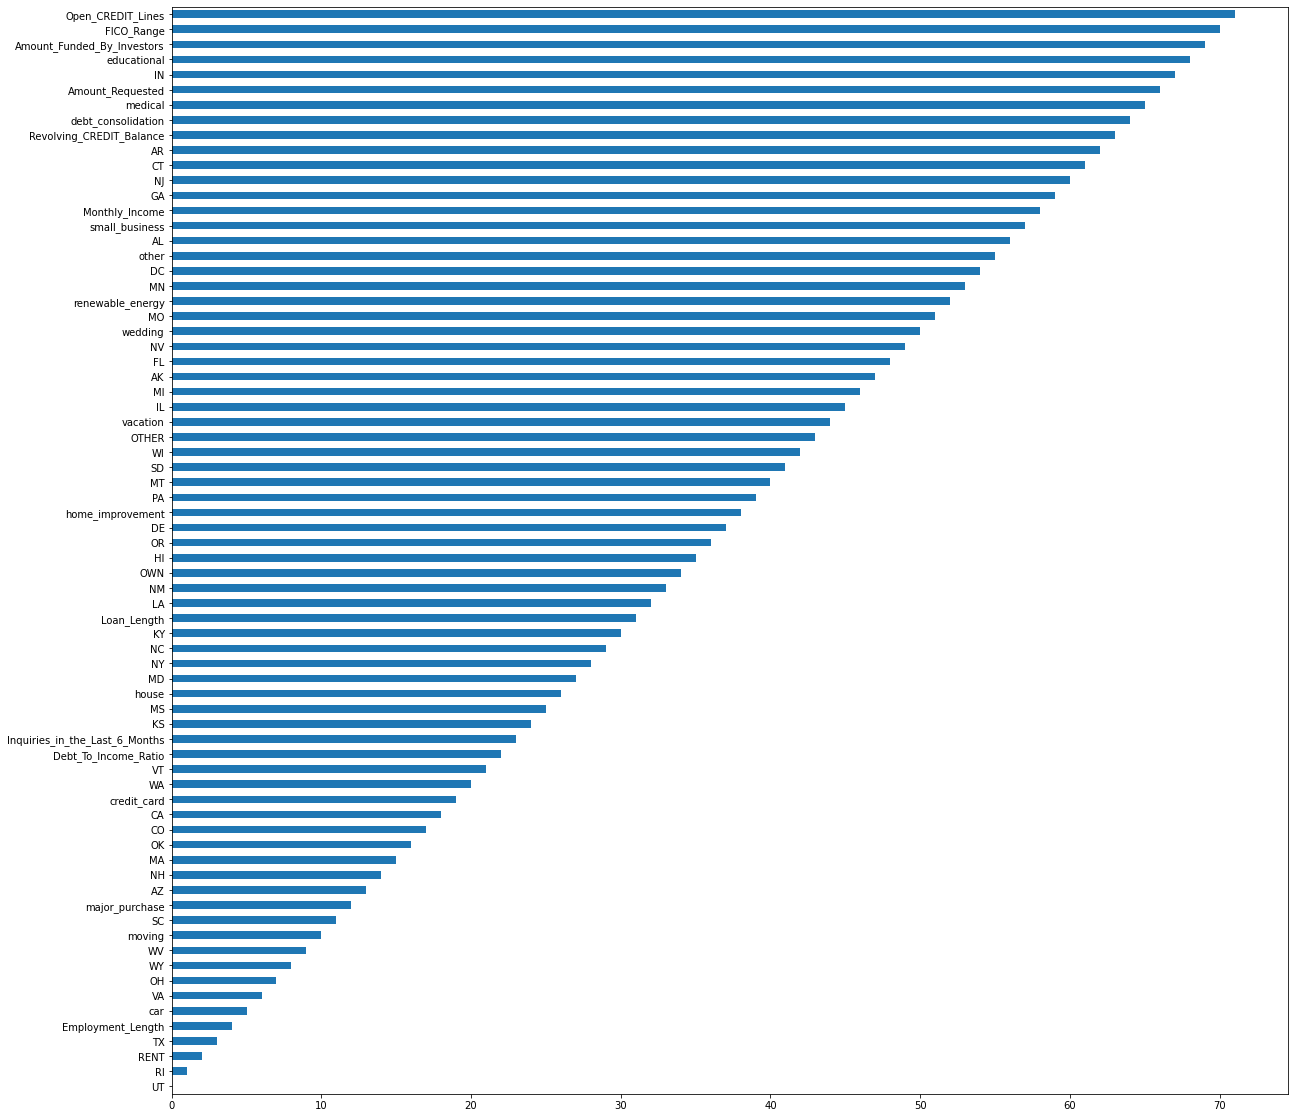

In [162]:
array = fisher_score.fisher_score(x.values,y)
plt.figure(figsize=(20,20))
s1 = pd.Series(array, index = x.columns)
s1.sort_values().plot(kind = 'barh')

In [163]:
array<=10

array([False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False,  True,  True,  True, False, False, False,  True,  True])

In [164]:
X = x.drop(x.columns[np.where(array < 4)[0]],axis = 1)

In [165]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [166]:
X_train

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,...,OR,PA,SC,SD,VA,VT,WA,WI,WV,WY
1849,16000.0,16000.00,36.0,9.47,5416.67,692,9,9.649756,0.0,10.0,...,0,0,0,0,0,0,0,0,0,0
1230,8000.0,8000.00,36.0,16.22,4166.67,677,12,9.731394,0.0,5.0,...,0,0,0,0,0,0,0,0,0,0
1359,7750.0,7750.00,36.0,22.01,4766.67,782,14,8.448272,2.5,6.0,...,0,0,0,0,0,0,0,0,0,0
1972,4200.0,4175.00,36.0,10.16,3041.67,812,4,7.344719,0.0,10.0,...,0,0,0,0,0,0,0,0,0,0
261,8000.0,8000.00,36.0,24.98,3166.67,692,10,8.599326,0.0,10.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,12000.0,11975.00,36.0,10.84,7083.33,687,11,9.933095,0.0,4.0,...,0,0,0,0,0,0,0,0,0,0
1033,8000.0,8000.00,60.0,2.38,5291.67,702,4,7.132498,2.5,5.0,...,0,0,0,0,0,0,0,0,0,0
2122,11000.0,6557.05,36.0,1.62,6667.00,692,7,8.417594,0.0,10.0,...,0,0,0,0,0,0,0,0,0,0
1425,8000.0,8000.00,60.0,6.29,4833.33,677,8,9.177404,2.5,6.0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
linear_fisher_score = LinearRegression()
linear_fisher_score.fit(X_train,y_train)

LinearRegression()

In [168]:
# Testing data


y_pred_test = linear_fisher_score.predict(X_test)

mae = mean_absolute_error(y_test,y_pred_test)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_test,y_pred_test)
print('mean_squared_error >>  ', mse)

rmae = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmae)

r2_scores = r2_score(y_test,y_pred_test)
print('r2_scores >>  ', r2_scores)


mean_absolute_error >>   1.6175792153758066
mean_squared_error >>   4.33840682237086
root_mean_squared_error >>   2.0828842556346863
r2_scores >>   0.7488527940875467


In [169]:
# Training data

y_pred_train = linear_fisher_score.predict(X_train)

mae = mean_absolute_error(y_train,y_pred_train)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_train,y_pred_train)
print('mean_squared_error >>  ', mse)

rmae = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmae)

r2_scores = r2_score(y_train,y_pred_train)
print('r2_scores >>  ', r2_scores)


mean_absolute_error >>   1.5102324821163053
mean_squared_error >>   3.7826137674765206
root_mean_squared_error >>   1.944894281825241
r2_scores >>   0.7832519767385304


## Variance Threshold

In [170]:
from sklearn.feature_selection import VarianceThreshold
var_thresh = VarianceThreshold(threshold=1.5)
var_thresh.fit(df1)
array_1 = var_thresh.get_support()
array_1

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [171]:
np.where(array_1 == False)

(array([ 8,  9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
        26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
        43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
        60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72], dtype=int64),)

In [172]:
var_data = df1.drop(df1.columns[np.where(array_1 == False)[0]],axis = 1)
var_data

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Employment_Length
0,25000.0,25000.00,18.49,60.0,27.56,8606.56,722,11,5.0
1,19750.0,19750.00,17.27,60.0,13.39,6737.50,712,14,4.0
2,2100.0,2100.00,14.33,36.0,3.50,1000.00,692,13,0.5
3,28000.0,28000.00,16.29,36.0,19.62,7083.33,712,12,10.0
4,24250.0,17431.82,12.23,60.0,23.79,5833.33,732,6,10.0
...,...,...,...,...,...,...,...,...,...
2195,30000.0,30000.00,23.28,60.0,12.10,7083.33,677,16,10.0
2196,4200.0,4200.00,14.33,60.0,14.16,3850.00,702,4,2.0
2197,19800.0,19775.00,15.31,60.0,15.03,6666.67,677,10,6.0
2198,18000.0,18000.00,20.99,60.0,11.63,9051.83,672,5,4.0


In [173]:
var_data.describe()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Employment_Length
count,2199.000000,2199.000000,2199.000000,2199.000000,2199.00000,2199.000000,2199.000000,2199.000000,2199.000000
mean,12492.837653,12075.878254,13.051382,41.195089,15.37025,5725.850414,708.089131,10.077763,5.561846
std,7850.147417,7770.042466,4.174292,9.886234,7.52039,4071.661717,35.270413,4.492219,3.568840
min,1000.000000,-0.010000,5.420000,36.000000,0.00000,588.500000,642.000000,2.000000,0.500000
25%,6000.000000,6000.000000,10.160000,36.000000,9.73500,3458.000000,682.000000,7.000000,2.000000
50%,10000.000000,10000.000000,13.110000,36.000000,15.22000,5000.000000,702.000000,9.000000,5.000000
75%,17000.000000,16200.000000,15.800000,36.000000,20.67500,6871.460000,727.000000,13.000000,10.000000
max,35000.000000,35000.000000,24.890000,60.000000,34.91000,102750.000000,832.000000,38.000000,10.000000


In [174]:
var_x = var_data.drop('Interest_Rate',axis=1)
var_y = var_data['Interest_Rate']

In [175]:
var_x_train,var_x_test,var_y_train,var_y_test = train_test_split(var_x,var_y,test_size=0.3,random_state=5)

In [176]:
linear_Variance_Threshold = LinearRegression()
linear_Variance_Threshold.fit(var_x_train,var_y_train)

LinearRegression()

In [177]:
# Testing data

y_pred_test = linear_Variance_Threshold.predict(var_x_test)

mae = mean_absolute_error(var_y_test,y_pred_test)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(var_y_test,y_pred_test)
print('mean_squared_error >>  ', mse)

rmae = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmae)

r2_scores = r2_score(var_y_test,y_pred_test)
print('r2_scores >>  ', r2_scores)


mean_absolute_error >>   1.6912578262784723
mean_squared_error >>   4.715864772427479
root_mean_squared_error >>   2.171604193315964
r2_scores >>   0.7270020287288574


In [178]:
# Training data

y_pred_train = linear_Variance_Threshold.predict(var_x_train)

mae = mean_absolute_error(var_y_train,y_pred_train)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(var_y_train,y_pred_train)
print('mean_squared_error >>  ', mse)

rmae = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmae)

r2_scores = r2_score(var_y_train,y_pred_train)
print('r2_scores >>  ', r2_scores)


mean_absolute_error >>   1.6148209996663114
mean_squared_error >>   4.276113630836791
root_mean_squared_error >>   2.067876599518644
r2_scores >>   0.7549738795183367


# Result

# KNN

In [179]:
df1.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,...,SC,SD,TX,UT,VA,VT,WA,WI,WV,WY
0,25000.0,25000.00,18.49,60.0,27.56,8606.56,722,11,9.629708,2.5,...,0,0,0,0,1,0,0,0,0,0
1,19750.0,19750.00,17.27,60.0,13.39,6737.50,712,14,9.855872,2.5,...,0,0,0,0,0,0,0,0,0,0
2,2100.0,2100.00,14.33,36.0,3.50,1000.00,692,13,6.817316,1.0,...,0,0,0,0,0,0,0,0,0,0
3,28000.0,28000.00,16.29,36.0,19.62,7083.33,712,12,10.550434,1.0,...,0,0,0,0,0,0,0,0,0,0
4,24250.0,17431.82,12.23,60.0,23.79,5833.33,732,6,10.343708,2.0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
df1.shape

(2199, 73)

In [181]:
df1.tail()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,...,SC,SD,TX,UT,VA,VT,WA,WI,WV,WY
2195,30000.0,30000.0,23.28,60.0,12.10,7083.33,677,16,9.796403,1.0,...,0,0,0,0,0,0,0,0,0,0
2196,4200.0,4200.0,14.33,60.0,14.16,3850.00,702,4,8.651374,0.0,...,0,0,0,0,0,0,0,0,0,0
2197,19800.0,19775.0,15.31,60.0,15.03,6666.67,677,10,10.755325,2.5,...,0,0,0,0,0,0,0,0,0,0
2198,18000.0,18000.0,20.99,60.0,11.63,9051.83,672,5,10.385728,2.0,...,0,0,0,0,0,0,0,0,0,0
2199,7550.0,7550.0,10.16,36.0,3.83,8333.33,712,10,9.230535,0.0,...,0,0,0,0,0,0,0,0,0,0


# Scaling

In [182]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [183]:
# revolving_credit_balance transformed


## Normalization 

In [184]:
x=df1.drop('Interest_Rate',axis=1)
y=df1['Interest_Rate']

In [185]:
normal_scaler=MinMaxScaler()
normal_array=normal_scaler.fit_transform(x)
normal_df=pd.DataFrame(normal_array,columns=x.columns)
normal_df.head()

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,...,SC,SD,TX,UT,VA,VT,WA,WI,WV,WY
0,0.705882,0.714286,1.0,0.789459,0.078484,0.421053,0.250000,0.580948,1.0,0.473684,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.551471,0.564286,1.0,0.383558,0.060189,0.368421,0.333333,0.627666,1.0,0.368421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.032353,0.060000,0.0,0.100258,0.004028,0.263158,0.305556,0.000000,0.4,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.794118,0.800000,0.0,0.562017,0.063574,0.368421,0.277778,0.771139,0.4,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.683824,0.498052,1.0,0.681467,0.051339,0.473684,0.111111,0.728437,0.8,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model training

In [186]:
x_train,x_test,y_train,y_test=train_test_split(normal_df,y,test_size=0.3,random_state=13)

In [187]:
x_train.head()

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,...,SC,SD,TX,UT,VA,VT,WA,WI,WV,WY
1580,0.558824,0.571429,0.0,0.445431,0.054601,0.368421,0.111111,0.664014,0.8,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2175,0.382353,0.400000,0.0,0.384990,0.071731,0.263158,0.388889,0.633549,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1531,0.558824,0.571429,1.0,0.449155,0.063574,0.421053,0.166667,0.607185,0.0,0.473684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
776,1.000000,1.000000,0.0,0.570610,0.132909,0.105263,0.277778,1.000000,0.4,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
691,0.402206,0.419286,0.0,0.428244,0.033393,0.394737,0.111111,0.544731,0.0,0.684211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [188]:
y_test.head()

25      14.65
139     23.28
1258    16.29
1852    14.65
1537    18.55
Name: Interest_Rate, dtype: float64

In [189]:
#training
knn_model=KNeighborsRegressor()
knn_model.fit(x_train,y_train)

KNeighborsRegressor()

In [190]:
# without hyp tuning
# evaluation


# Testing data

y_pred= knn_model.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_test,y_pred)
print('mean_squared_error >>  ', mse)

rmse = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmse)

r2_scores = r2_score(y_test,y_pred)
print('r2_scores >>  ', r2_scores)

mean_absolute_error >>   2.8434181818181816
mean_squared_error >>   12.624122412121213
root_mean_squared_error >>   3.553044105006468
r2_scores >>   0.29330409893043674


In [191]:
# Training data

y_pred_train = knn_model.predict(x_train)

mae = mean_absolute_error(y_train,y_pred_train)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_train,y_pred_train)
print('mean_squared_error >>  ', mse)

rmse = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmse)

r2_scores = r2_score(y_train,y_pred_train)
print('r2_scores >>  ', r2_scores)

mean_absolute_error >>   2.414214424951267
mean_squared_error >>   8.978569434697855
root_mean_squared_error >>   2.9964261103350864
r2_scores >>   0.47871890229588665


In [192]:
# with hyp tuning
knn_model=KNeighborsRegressor()
hyp={'n_neighbors':np.arange(2,30),
    'p':[1,2]}
rscv_knn_model=RandomizedSearchCV(knn_model,hyp,cv=5)
rscv_knn_model.fit(x_train,y_train)
rscv_knn_model.best_estimator_

KNeighborsRegressor(n_neighbors=23, p=1)

In [193]:
knn_model=rscv_knn_model.best_estimator_
knn_model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=23, p=1)

In [194]:
# Testing data

y_pred= knn_model.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_test,y_pred)
print('mean_squared_error >>  ', mse)

rmse = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmse)

r2_scores = r2_score(y_test,y_pred)
print('r2_scores >>  ', r2_scores)

mean_absolute_error >>   2.6144808959156784
mean_squared_error >>   10.33279232915163
root_mean_squared_error >>   3.2144661032824144
r2_scores >>   0.42157230837660153


In [195]:
# Training data

y_pred_train = knn_model.predict(x_train)

mae = mean_absolute_error(y_train,y_pred_train)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_train,y_pred_train)
print('mean_squared_error >>  ', mse)

rmse = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmse)

r2_scores = r2_score(y_train,y_pred_train)
print('r2_scores >>  ', r2_scores)

mean_absolute_error >>   2.48630505410063
mean_squared_error >>   9.456230833858433
root_mean_squared_error >>   3.075098507992619
r2_scores >>   0.450986660506559


# decision tree

In [196]:
from sklearn.tree import DecisionTreeRegressor

In [197]:
x

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,...,SC,SD,TX,UT,VA,VT,WA,WI,WV,WY
0,25000.0,25000.00,60.0,27.56,8606.56,722,11,9.629708,2.5,5.0,...,0,0,0,0,1,0,0,0,0,0
1,19750.0,19750.00,60.0,13.39,6737.50,712,14,9.855872,2.5,4.0,...,0,0,0,0,0,0,0,0,0,0
2,2100.0,2100.00,36.0,3.50,1000.00,692,13,6.817316,1.0,0.5,...,0,0,0,0,0,0,0,0,0,0
3,28000.0,28000.00,36.0,19.62,7083.33,712,12,10.550434,1.0,10.0,...,0,0,0,0,0,0,0,0,0,0
4,24250.0,17431.82,60.0,23.79,5833.33,732,6,10.343708,2.0,10.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000.0,30000.00,60.0,12.10,7083.33,677,16,9.796403,1.0,10.0,...,0,0,0,0,0,0,0,0,0,0
2196,4200.0,4200.00,60.0,14.16,3850.00,702,4,8.651374,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2197,19800.0,19775.00,60.0,15.03,6666.67,677,10,10.755325,2.5,6.0,...,0,0,0,0,0,0,0,0,0,0
2198,18000.0,18000.00,60.0,11.63,9051.83,672,5,10.385728,2.0,4.0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
y

0       18.49
1       17.27
2       14.33
3       16.29
4       12.23
        ...  
2195    23.28
2196    14.33
2197    15.31
2198    20.99
2199    10.16
Name: Interest_Rate, Length: 2199, dtype: float64

In [199]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=23)

In [200]:
dt_modl=DecisionTreeRegressor()
dt_modl.fit(x_train,y_train)

DecisionTreeRegressor()

##  without hyp 

In [201]:
# Testing data

y_pred= dt_modl.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_test,y_pred)
print('mean_squared_error >>  ', mse)

rmse = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmse)

r2_scores = r2_score(y_test,y_pred)
print('r2_scores >>  ', r2_scores)

mean_absolute_error >>   1.83630303030303
mean_squared_error >>   6.367641212121211
root_mean_squared_error >>   2.523418556664988
r2_scores >>   0.6261475303344243


In [202]:
# Training data

y_pred_train = dt_modl.predict(x_train)

mae = mean_absolute_error(y_train,y_pred_train)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_train,y_pred_train)
print('mean_squared_error >>  ', mse)

rmse = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmse)

r2_scores = r2_score(y_train,y_pred_train)
print('r2_scores >>  ', r2_scores)

mean_absolute_error >>   3.8089522872130125e-17
mean_squared_error >>   6.458510335142786e-32
root_mean_squared_error >>   2.541359938132099e-16
r2_scores >>   1.0


##  wtih hyp

In [203]:
dt_modl=DecisionTreeRegressor()
dt_modl.fit(x_train,y_train)

DecisionTreeRegressor()

In [204]:
  
hyp={'criterion':['mae','mse'],
    'max_depth':np.arange(2,30),
    'min_samples_split':np.arange(2,20),
    'min_samples_leaf':np.arange(2,15)}
rscv_modl=RandomizedSearchCV(dt_modl,hyp,cv=5)  
rscv_modl.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['mae', 'mse'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [205]:
rscv_modl.best_estimator_

DecisionTreeRegressor(criterion='mae', max_depth=9, min_samples_leaf=8,
                      min_samples_split=15)

In [206]:
dt_modl_hyp=rscv_modl.best_estimator_
dt_modl_hyp.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mae', max_depth=9, min_samples_leaf=8,
                      min_samples_split=15)

In [207]:
# Testing data

y_pred= dt_modl_hyp.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_test,y_pred)
print('mean_squared_error >>  ', mse)

rmse = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmse)

r2_scores = r2_score(y_test,y_pred)
print('r2_scores >>  ', r2_scores)

mean_absolute_error >>   1.4989848484848485
mean_squared_error >>   4.242539166666667
root_mean_squared_error >>   2.059742500087491
r2_scores >>   0.7509150261022786


In [208]:
# Training data

y_pred_train = dt_modl_hyp.predict(x_train)

mae = mean_absolute_error(y_train,y_pred_train)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_train,y_pred_train)
print('mean_squared_error >>  ', mse)

rmse = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmse)

r2_scores = r2_score(y_train,y_pred_train)
print('r2_scores >>  ', r2_scores)

mean_absolute_error >>   1.0358739441195581
mean_squared_error >>   2.5713584145549055
root_mean_squared_error >>   1.603545576076622
r2_scores >>   0.8537421632824167


## pruning

In [209]:
dt_modl =DecisionTreeRegressor()
dt_modl.fit(x_train, y_train)

DecisionTreeRegressor()

In [210]:
result = dt_modl.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha_list = result['ccp_alphas']

In [211]:
train_data_accuracy = []
test_data_accuracy = []

for ccp_alpha in ccp_alpha_list:
    dt_modl = DecisionTreeRegressor(ccp_alpha=ccp_alpha)
    dt_modl.fit(x_train, y_train)
    train_accuracy = dt_modl.score(x_train, y_train)
    train_data_accuracy.append(train_accuracy)
    test_accuracy = dt_modl.score(x_test, y_test)
    test_data_accuracy.append(test_accuracy)
    
#     print("ccp_alpha      :",ccp_alpha)
#     print('train_accuracy :',train_accuracy)
#     print("Test Accuracy  :",test_accuracy)
#     print("*"*80)

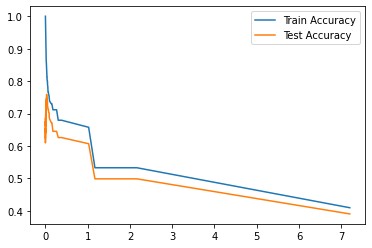

In [212]:
fig,ax = plt.subplots()
ax.plot(ccp_alpha_list,train_data_accuracy,label = "Train Accuracy")
ax.plot(ccp_alpha_list,test_data_accuracy, label = "Test Accuracy")
ax.legend()

In [213]:
dt_modl = DecisionTreeRegressor(ccp_alpha=0.03)
dt_modl.fit(x_train, y_train)
dt_modl.score(x_train, y_train)


0.8232521675898613

In [214]:
dt_modl.score(x_test, y_test)

0.7584842982134277

# random forest

In [215]:
from sklearn.ensemble import RandomForestRegressor

In [216]:
rf_modl=RandomForestRegressor()
rf_modl.fit(x_train,y_train)

RandomForestRegressor()

In [217]:
# Testing data

y_pred= rf_modl.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_test,y_pred)
print('mean_squared_error >>  ', mse)

rmse = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmse)

r2_scores = r2_score(y_test,y_pred)
print('r2_scores >>  ', r2_scores)

mean_absolute_error >>   1.3379349999999997
mean_squared_error >>   3.2659278000757586
root_mean_squared_error >>   1.8071878153849308
r2_scores >>   0.808253145374526


In [218]:
# Training data

y_pred_train = rf_modl.predict(x_train)

mae = mean_absolute_error(y_train,y_pred_train)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_train,y_pred_train)
print('mean_squared_error >>  ', mse)

rmse = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmse)

r2_scores = r2_score(y_train,y_pred_train)
print('r2_scores >>  ', r2_scores)

mean_absolute_error >>   0.4957424301494468
mean_squared_error >>   0.4729097521507462
root_mean_squared_error >>   0.6876843404867863
r2_scores >>   0.9731010827114939


In [219]:
hyp={'n_estimators':np.arange(50,200)}
rscv_rf=RandomizedSearchCV(rf_modl,hyp,cv=5)
rscv_rf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'n_estimators': array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199])})

In [220]:
rscv_rf.best_estimator_

RandomForestRegressor(n_estimators=93)

In [221]:
rf_modl_hyp=rscv_rf.best_estimator_
rf_modl_hyp.fit(x_train,y_train)

RandomForestRegressor(n_estimators=93)

In [222]:
# Testing data

y_pred= rf_modl_hyp.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_test,y_pred)
print('mean_squared_error >>  ', mse)

rmse = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmse)

r2_scores = r2_score(y_test,y_pred)
print('r2_scores >>  ', r2_scores)

mean_absolute_error >>   1.3289416748126421
mean_squared_error >>   3.226306040179806
root_mean_squared_error >>   1.7961920944542111
r2_scores >>   0.8105793902580162


In [223]:
# Training data

y_pred_train = rf_modl_hyp.predict(x_train)

mae = mean_absolute_error(y_train,y_pred_train)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_train,y_pred_train)
print('mean_squared_error >>  ', mse)

rmse = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmse)

r2_scores = r2_score(y_train,y_pred_train)
print('r2_scores >>  ', r2_scores)

mean_absolute_error >>   0.5018221579436439
mean_squared_error >>   0.4799374222953049
root_mean_squared_error >>   0.6927751599872104
r2_scores >>   0.9727013516484535


# adaboost

In [224]:
from sklearn.ensemble import AdaBoostRegressor

In [225]:
x

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,...,SC,SD,TX,UT,VA,VT,WA,WI,WV,WY
0,25000.0,25000.00,60.0,27.56,8606.56,722,11,9.629708,2.5,5.0,...,0,0,0,0,1,0,0,0,0,0
1,19750.0,19750.00,60.0,13.39,6737.50,712,14,9.855872,2.5,4.0,...,0,0,0,0,0,0,0,0,0,0
2,2100.0,2100.00,36.0,3.50,1000.00,692,13,6.817316,1.0,0.5,...,0,0,0,0,0,0,0,0,0,0
3,28000.0,28000.00,36.0,19.62,7083.33,712,12,10.550434,1.0,10.0,...,0,0,0,0,0,0,0,0,0,0
4,24250.0,17431.82,60.0,23.79,5833.33,732,6,10.343708,2.0,10.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000.0,30000.00,60.0,12.10,7083.33,677,16,9.796403,1.0,10.0,...,0,0,0,0,0,0,0,0,0,0
2196,4200.0,4200.00,60.0,14.16,3850.00,702,4,8.651374,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2197,19800.0,19775.00,60.0,15.03,6666.67,677,10,10.755325,2.5,6.0,...,0,0,0,0,0,0,0,0,0,0
2198,18000.0,18000.00,60.0,11.63,9051.83,672,5,10.385728,2.0,4.0,...,0,0,0,0,0,0,0,0,0,0


In [226]:
y

0       18.49
1       17.27
2       14.33
3       16.29
4       12.23
        ...  
2195    23.28
2196    14.33
2197    15.31
2198    20.99
2199    10.16
Name: Interest_Rate, Length: 2199, dtype: float64

In [227]:
ada_modl=AdaBoostRegressor()
ada_modl.fit(x_train,y_train)

AdaBoostRegressor()

In [228]:
# Testing data

y_pred= ada_modl.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_test,y_pred)
print('mean_squared_error >>  ', mse)

rmse = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmse)

r2_scores = r2_score(y_test,y_pred)
print('r2_scores >>  ', r2_scores)

mean_absolute_error >>   1.8862594919216331
mean_squared_error >>   5.281764358681845
root_mean_squared_error >>   2.2982089458275645
r2_scores >>   0.6899007679757387


In [229]:
# Training data

y_pred_train = ada_modl.predict(x_train)

mae = mean_absolute_error(y_train,y_pred_train)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_train,y_pred_train)
print('mean_squared_error >>  ', mse)

rmse = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmse)

r2_scores = r2_score(y_train,y_pred_train)
print('r2_scores >>  ', r2_scores)

mean_absolute_error >>   1.7968606147074004
mean_squared_error >>   4.623274129988819
root_mean_squared_error >>   2.150180022693174
r2_scores >>   0.7370300192392363


In [230]:
# hyp tunning

In [231]:
hyp={'n_estimators':np.arange(50,200)}
rscv_ada=RandomizedSearchCV(ada_modl,hyp,cv=5)
rscv_ada.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'n_estimators': array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199])})

In [232]:
rscv_ada.best_estimator_

AdaBoostRegressor(n_estimators=159)

In [233]:
ada_modl_hyp=rscv_ada.best_estimator_
ada_modl_hyp.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=159)

In [234]:
# Testing data

y_pred= ada_modl_hyp.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_test,y_pred)
print('mean_squared_error >>  ', mse)

rmse = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmse)

r2_scores = r2_score(y_test,y_pred)
print('r2_scores >>  ', r2_scores)

mean_absolute_error >>   1.8976658162950146
mean_squared_error >>   5.3082872501723575
root_mean_squared_error >>   2.3039720593297908
r2_scores >>   0.6883435746358368


In [235]:
# Training data

y_pred_train = ada_modl_hyp.predict(x_train)

mae = mean_absolute_error(y_train,y_pred_train)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_train,y_pred_train)
print('mean_squared_error >>  ', mse)

rmse = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmse)

r2_scores = r2_score(y_train,y_pred_train)
print('r2_scores >>  ', r2_scores)

mean_absolute_error >>   1.8003696419463862
mean_squared_error >>   4.594943793013155
root_mean_squared_error >>   2.1435820005339554
r2_scores >>   0.7386414374593049


In [236]:
# accuracy of models:
#     1.Decision tree with hyp tunning:
#         training = r2_scores >>   0.8244691490324103
#         testing = r2_scores >>   0.778211315306422
        
#     2. Random forest:
#         training = r2_scores >>   0.9726311869211437
#         testing = r2_scores >>   0.8113476000619101
        
#     3. Random forest with hyp tunning:
#         training = r2_scores >>   0.9731448630186162
#         testing = r2_scores >>   0.8098487007832428
        
#     4. adaboost:
#         training = r2_scores >>   0.7302207336995821
#         testing = r2_scores >>   0.7060971894750295
        
#     5. adaboost with hyp tunning:
#         training = r2_scores >>   0.7357223344467534
#         testing = r2_scores >>   0.7059922903186677
        

In [237]:
import pickle
with open('dt_modl.pkl', 'wb') as files:
    pickle.dump(ada_modl_hyp, files)

In [238]:
columns_dict = {"columns" : x_train.columns}
dict_cols = open("columns.pkl",'wb')
pickle.dump(columns_dict,dict_cols)
dict_cols.close()

In [240]:
x_train.columns

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Loan_Length',
       'Debt_To_Income_Ratio', 'Monthly_Income', 'FICO_Range',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length', 'car',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'house', 'major_purchase', 'medical', 'moving', 'other',
       'renewable_energy', 'small_business', 'vacation', 'wedding', 'OTHER',
       'OWN', 'RENT', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE',
       'FL', 'GA', 'HI', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR',
       'PA', 'RI', 'SC', 'SD', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object')

In [241]:
x_train.columns.shape

(72,)

In [253]:
x_train.iloc[:,10:24].head()

,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
692,0,0,1,0,0,0,0,0,0,0,0,0,0,0
906,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1879,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1537,0,0,1,0,0,0,0,0,0,0,0,0,0,0
508,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [257]:
x_train.iloc[:,24:27].head()

,OTHER,OWN,RENT
692,0,0,0
906,0,0,0
1879,0,0,1
1537,0,1,0
508,0,0,0


In [258]:
x_train.iloc[:,27:].head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SC,SD,TX,UT,VA,VT,WA,WI,WV,WY
692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1537,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
508,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
